In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
#spacy_eng = spacy.load("en_core_web_sm")
lemm = WordNetLemmatizer()
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['font.size'] = 16
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Lea
[nltk_data]     Keller\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Lea
[nltk_data]     Keller\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_json("data.json", orient="columns")
df.head(100)

,comment_text,toxic
0,U created Requests for Scholarlyarticles is aw...,1
1,in looking at the LGBT professions categories ...,1
2,New York City regulation Regarding the removal...,0
3,Thank you for the speedy rollback Would you be...,1
4,If you want to talk about this stuff Then pe...,0
...,...,...
95,A barnstar for you The Modest Barnstar You are...,0
96,So what can be done about,0
97,Funny that you call what the source says as Ex...,0
98,Congratulations! I am happy to see that your R...,0


In [3]:
df["comment_text"] = df["comment_text"].str.lower()
df.head()

,comment_text,toxic
0,u created requests for scholarlyarticles is aw...,1
1,in looking at the lgbt professions categories ...,1
2,new york city regulation regarding the removal...,0
3,thank you for the speedy rollback would you be...,1
4,if you want to talk about this stuff then pe...,0


In [4]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df["comment_text"] = df["comment_text"].apply(lambda x: remove_stopwords(x))

In [5]:
df

,comment_text,toxic
0,u created requests scholarlyarticles awaiting ...,1
1,looking lgbt professions categories point get ...,1
2,"new york city regulation regarding removal, , ...",0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aires province wi...,1
312731,"little doubt hi matthew, long time new doubt, ...",0
312732,"accor hello, new accor logo september changed ...",0
312733,wondering ehuangzhang d00d simply based appear...,0


In [6]:
from nltk.tokenize import RegexpTokenizer
df["comment_text"] = df["comment_text"].apply(lambda x: "".join(RegexpTokenizer(r"[a-zA-Z0-9]+ ").tokenize(x)))

In [7]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["comment_text"] = df["comment_text"].apply(lambda x: lemmatize(x))
df

,comment_text,toxic
0,u created request scholarlyarticles awaiting c...,1
1,looking lgbt profession category point get beh...,1
2,new york city regulation regarding apparently ...,0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aire province wik...,1
312731,little doubt hi long time new would like know ...,0
312732,accor new accor logo september changed french ...,0
312733,wondering ehuangzhang d00d simply based appear...,0


In [8]:
df["comment_text"] = df["comment_text"].str.strip()

In [9]:
df

,comment_text,toxic
0,u created request scholarlyarticles awaiting c...,1
1,looking lgbt profession category point get beh...,1
2,new york city regulation regarding apparently ...,0
3,thank speedy rollback would believe first time...,1
4,want talk stuff perfectly willing refer commen...,0
...,...,...
312730,partido name partidos buenos aire province wik...,1
312731,little doubt hi long time new would like know ...,0
312732,accor new accor logo september changed french ...,0
312733,wondering ehuangzhang d00d simply based appear...,0


In [10]:
df.isna().sum()

comment_text    0
toxic           0
dtype: int64

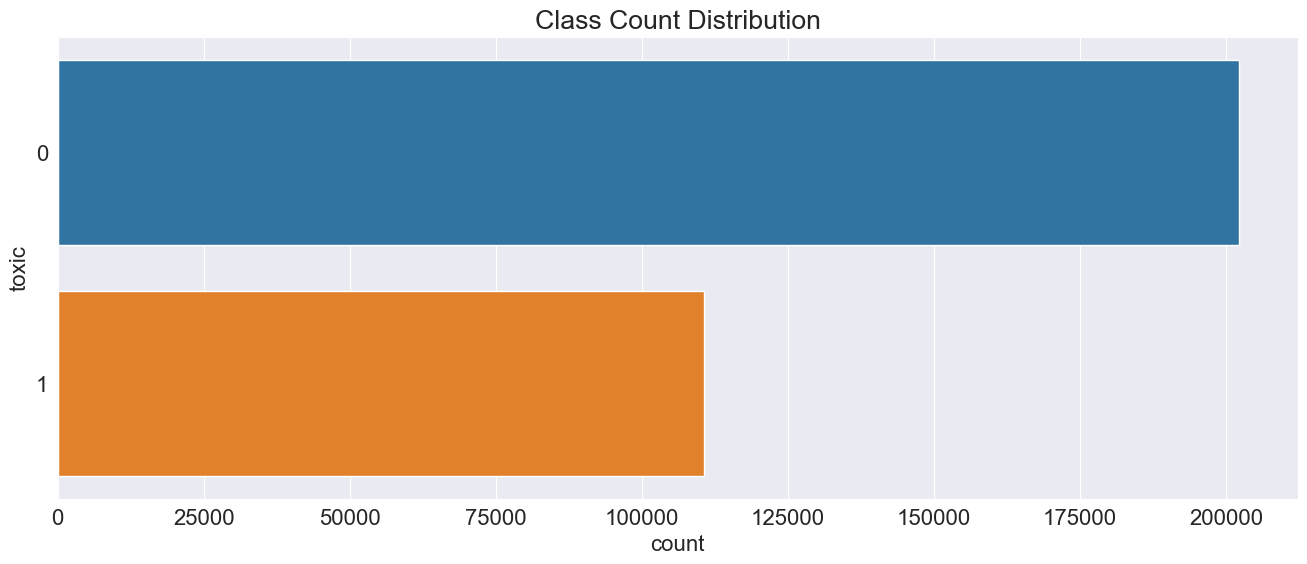

In [11]:
sns.countplot(data=df,y='toxic')
plt.title("Class Count Distribution")
plt.show()

In [12]:
df['sentence_lengths'] = df['comment_text'].progress_apply(lambda x: len(x.split()))

100%|██████████| 312735/312735 [00:01<00:00, 244023.83it/s]


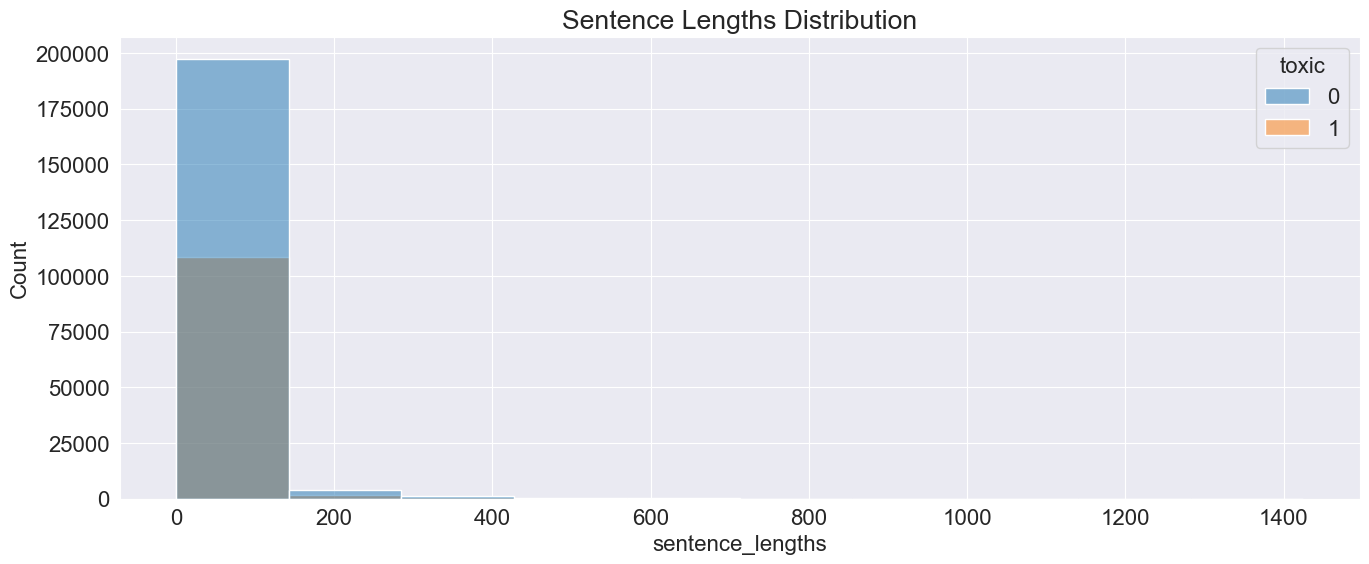

In [13]:
sns.histplot(data=df,x='sentence_lengths',hue='toxic',bins=10, element='bars')
plt.title("Sentence Lengths Distribution")
plt.show()


In [14]:
df["sentence_lengths"].describe()

count    312735.000000
mean         24.834425
std          45.047428
min           0.000000
25%           5.000000
50%          12.000000
75%          27.000000
max        1425.000000
Name: sentence_lengths, dtype: float64

In [15]:
df.to_json("data_pp.json", orient="columns")

In [16]:
df_sample = df.sample(frac=0.25, ignore_index=True)
df_sample.reset_index(drop=True, inplace=True)
df_sample.to_json("data_pp_sample.json")